In [192]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint
import requests

In [193]:
# Read the CSV file into the valuations DataFrame
file_path = "resources/valuations_by_zip.csv"
valuations = pd.read_csv(file_path)

# Now you have the DataFrame valuations with data from "valuations_by_zip.csv"
valuations.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2000,...,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023
0,61148,0,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,130495.05400,...,522911.9386,525760.9170,529585.5433,532686.3869,535392.3916,537659.7100,541718.3694,547034.2568,552740.3348,557699.9148
1,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,223783.26330,...,489818.3844,488119.8233,486700.7429,484703.5506,482475.3787,481336.2020,482130.0237,484303.7853,486757.3268,489401.7676
2,91940,2,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,113663.91730,...,286215.8130,285608.5459,284607.9114,283023.8272,281199.6336,279635.9665,278828.7963,278477.9276,278667.2520,279406.7706
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,98291.00869,...,436429.3082,433923.3496,433047.6669,431340.1718,431285.7080,432070.7890,434946.1341,436790.9086,440642.7600,447181.4880
4,92593,4,78660,zip,TX,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,184599.88630,...,461233.3543,454831.3355,447984.4616,440769.6379,434524.0617,429565.2938,426007.1345,422638.1156,420350.3307,419499.3968


In [194]:

def get_zip_code_data(zip_codes):
    base_url = "https://zip-code-master.p.rapidapi.com/detail/"

    headers = {
        "X-RapidAPI-Key": "558adedba3msh9b5c4fc48b9c426p17c2a9jsnae5efc3a2061",
        "X-RapidAPI-Host": "zip-code-master.p.rapidapi.com"
    }

    for zip_code in zip_codes:
        url = base_url + str(zip_code)
        response = requests.get(url, headers=headers)
        data = response.json()
        print(f"Data for Zip Code {zip_code}:")
        print(data)
        print()

# List of zip codes to fetch data for
zip_codes = [78741, 78729, 78748, 78724, 78733]

# Call the function to get data for the specified zip codes
# get_zip_code_data(zip_codes)

In [195]:
url = "https://zip-code-master.p.rapidapi.com/detail/78741"

headers = {
    "X-RapidAPI-Key": "558adedba3msh9b5c4fc48b9c426p17c2a9jsnae5efc3a2061",
    "X-RapidAPI-Host": "zip-code-master.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
data_78741 = response.json()

# Extract the subcategories under the "summary" header
summary_data = data_78741.get("summary", {})
ethnicity_data = data_78741.get("ethnicity", {})
education_data = data_78741.get("education", {})

# Filter the specific categories for zipcode 78741
filtered_data_78741 = {
    "ZipCode": summary_data.get("zip_code"),
    "Population": summary_data.get("population"),
    "MedianHouseholdIncome": summary_data.get("median_household_income"),
}

# Convert the 'ethnicity_data' and 'education_data' dictionaries to DataFrames
ethnicity_df = pd.DataFrame(ethnicity_data.items(), columns=["Ethnicity", "Value"])
education_df = pd.DataFrame(education_data.items(), columns=["Education", "Value"])

# Concatenate the 'ethnicity_df' and 'education_df' vertically to create the final DataFrame
zip_78741 = pd.concat([pd.DataFrame([filtered_data_78741]), ethnicity_df, education_df], axis=1)

# Now you have the DataFrame zip_78741 with filtered data for zipcode 78741
print(zip_78741)

# Save the DataFrame to a CSV file in the "resources" folder
file_name = "resources/zip_78741.csv"
zip_78741.to_csv(file_name, index=False)

  ZipCode Population MedianHouseholdIncome               Ethnicity  \
0   78741     46,147               $54,422                   White   
1     NaN        NaN                   NaN                   Black   
2     NaN        NaN                   NaN                Hispanic   
3     NaN        NaN                   NaN                   Asian   
4     NaN        NaN                   NaN         Native American   
5     NaN        NaN                   NaN  Hawaiian/Pac. Islander   
6     NaN        NaN                   NaN                     NaN   
7     NaN        NaN                   NaN                     NaN   
8     NaN        NaN                   NaN                     NaN   
9     NaN        NaN                   NaN                     NaN   

           Value                    Education         Value  
0  27,297,46.64%  Less Than 1 Year of College   1,054,6.22%  
1    5,124,8.75%              Bachelor Degree  3,655,21.58%  
2  23,184,39.61%          High School Diplo

In [196]:
url = "https://zip-code-master.p.rapidapi.com/detail/78729"

headers = {
    "X-RapidAPI-Key": "558adedba3msh9b5c4fc48b9c426p17c2a9jsnae5efc3a2061",
    "X-RapidAPI-Host": "zip-code-master.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
data_78729 = response.json()

# Extract the subcategories under the "summary" header
summary_data1 = data_78729.get("summary", {})
ethnicity_data1 = data_78729.get("ethnicity", {})
education_data1 = data_78729.get("education", {})

# Filter the specific categories for zipcode 78729
filtered_data_78729 = {
    "ZipCode": summary_data1.get("zip_code"),
    "Population": summary_data1.get("population"),
    "MedianHouseholdIncome": summary_data1.get("median_household_income"),
}

# Convert the 'ethnicity_data' and 'education_data' dictionaries to DataFrames
ethnicity_df1 = pd.DataFrame(ethnicity_data1.items(), columns=["Ethnicity", "Value"])
education_df1 = pd.DataFrame(education_data1.items(), columns=["Education", "Value"])

# Concatenate the 'ethnicity_df' and 'education_df' vertically to create the final DataFrame
zip_78729 = pd.concat([pd.DataFrame([filtered_data_78729]), ethnicity_df1, education_df1], axis=1)

# Now you have the DataFrame zip_78729 with filtered data for zipcode 78729
print(zip_78729)

# Save the DataFrame to a CSV file in the "resources" folder
file_name = "resources/zip_78729.csv"
zip_78729.to_csv(file_name, index=False)

  ZipCode Population MedianHouseholdIncome               Ethnicity  \
0   78729     30,907               $76,615                   White   
1     NaN        NaN                   NaN                   Black   
2     NaN        NaN                   NaN                Hispanic   
3     NaN        NaN                   NaN                   Asian   
4     NaN        NaN                   NaN         Native American   
5     NaN        NaN                   NaN  Hawaiian/Pac. Islander   
6     NaN        NaN                   NaN                     NaN   
7     NaN        NaN                   NaN                     NaN   
8     NaN        NaN                   NaN                     NaN   
9     NaN        NaN                   NaN                     NaN   

           Value                    Education         Value  
0  21,547,64.04%  Less Than 1 Year of College   1,399,7.73%  
1    1,896,5.63%              Bachelor Degree  6,122,33.81%  
2   6,183,18.38%          High School Diplo

In [197]:
url = "https://zip-code-master.p.rapidapi.com/detail/78748"

headers = {
    "X-RapidAPI-Key": "558adedba3msh9b5c4fc48b9c426p17c2a9jsnae5efc3a2061",
    "X-RapidAPI-Host": "zip-code-master.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
data_78748 = response.json()

# Extract the subcategories under the "summary" header
summary_data2 = data_78748.get("summary", {})
ethnicity_data2 = data_78748.get("ethnicity", {})
education_data2 = data_78748.get("education", {})

# Filter the specific categories for zipcode 78748
filtered_data_78748 = {
    "ZipCode": summary_data2.get("zip_code"),
    "Population": summary_data2.get("population"),
    "MedianHouseholdIncome": summary_data2.get("median_household_income"),
}

# Convert the 'ethnicity_data' and 'education_data' dictionaries to DataFrames
ethnicity_df2 = pd.DataFrame(ethnicity_data2.items(), columns=["Ethnicity", "Value"])
education_df2 = pd.DataFrame(education_data2.items(), columns=["Education", "Value"])

# Concatenate the 'ethnicity_df' and 'education_df' vertically to create the final DataFrame
zip_78748 = pd.concat([pd.DataFrame([filtered_data_78748]), ethnicity_df2, education_df2], axis=1)

# Now you have the DataFrame zip_78748 with filtered data for zipcode 78748
print(zip_78748)

# Save the DataFrame to a CSV file in the "resources" folder
file_name = "resources/zip_78748.csv"
zip_78748.to_csv(file_name, index=False)

  ZipCode Population MedianHouseholdIncome               Ethnicity  \
0   78748     53,501               $89,480                   White   
1     NaN        NaN                   NaN                   Black   
2     NaN        NaN                   NaN                Hispanic   
3     NaN        NaN                   NaN                   Asian   
4     NaN        NaN                   NaN         Native American   
5     NaN        NaN                   NaN  Hawaiian/Pac. Islander   
6     NaN        NaN                   NaN                     NaN   
7     NaN        NaN                   NaN                     NaN   
8     NaN        NaN                   NaN                     NaN   
9     NaN        NaN                   NaN                     NaN   

           Value                    Education         Value  
0  40,507,61.39%  Less Than 1 Year of College   1,802,7.12%  
1    3,276,4.96%              Bachelor Degree  7,765,30.66%  
2  19,473,29.51%          High School Diplo

In [198]:
url = "https://zip-code-master.p.rapidapi.com/detail/78724"

headers = {
    "X-RapidAPI-Key": "558adedba3msh9b5c4fc48b9c426p17c2a9jsnae5efc3a2061",
    "X-RapidAPI-Host": "zip-code-master.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
data_78724 = response.json()

# Extract the subcategories under the "summary" header
summary_data3 = data_78724.get("summary", {})
ethnicity_data3 = data_78724.get("ethnicity", {})
education_data3 = data_78724.get("education", {})

# Filter the specific categories for zipcode 78724
filtered_data_78724 = {
    "ZipCode": summary_data3.get("zip_code"),
    "Population": summary_data3.get("population"),
    "MedianHouseholdIncome": summary_data3.get("median_household_income"),
}

# Convert the 'ethnicity_data' and 'education_data' dictionaries to DataFrames
ethnicity_df3 = pd.DataFrame(ethnicity_data3.items(), columns=["Ethnicity", "Value"])
education_df3 = pd.DataFrame(education_data3.items(), columns=["Education", "Value"])

# Concatenate the 'ethnicity_df' and 'education_df' vertically to create the final DataFrame
zip_78724 = pd.concat([pd.DataFrame([filtered_data_78724]), ethnicity_df3, education_df3], axis=1)

# Now you have the DataFrame zip_78724 with filtered data for zipcode 78724
print(zip_78724)

# Save the DataFrame to a CSV file in the "resources" folder
file_name = "resources/zip_78724.csv"
zip_78724.to_csv(file_name, index=False)

  ZipCode Population MedianHouseholdIncome               Ethnicity  \
0   78724     25,936               $58,631                   White   
1     NaN        NaN                   NaN                   Black   
2     NaN        NaN                   NaN                Hispanic   
3     NaN        NaN                   NaN                   Asian   
4     NaN        NaN                   NaN         Native American   
5     NaN        NaN                   NaN  Hawaiian/Pac. Islander   
6     NaN        NaN                   NaN                     NaN   
7     NaN        NaN                   NaN                     NaN   
8     NaN        NaN                   NaN                     NaN   
9     NaN        NaN                   NaN                     NaN   

           Value                    Education         Value  
0   7,706,25.12%  Less Than 1 Year of College    748,10.41%  
1   5,717,18.63%              Bachelor Degree    828,11.52%  
2  16,746,54.58%          High School Diplo

In [199]:
url = "https://zip-code-master.p.rapidapi.com/detail/78733"

headers = {
    "X-RapidAPI-Key": "558adedba3msh9b5c4fc48b9c426p17c2a9jsnae5efc3a2061",
    "X-RapidAPI-Host": "zip-code-master.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
data_78733 = response.json()

# Extract the subcategories under the "summary" header
summary_data4 = data_78733.get("summary", {})
ethnicity_data4 = data_78733.get("ethnicity", {})
education_data4 = data_78733.get("education", {})

# Filter the specific categories for zipcode 78733
filtered_data_78733 = {
    "ZipCode": summary_data4.get("zip_code"),
    "Population": summary_data4.get("population"),
    "MedianHouseholdIncome": summary_data4.get("median_household_income"),
}

# Convert the 'ethnicity_data' and 'education_data' dictionaries to DataFrames
ethnicity_df4 = pd.DataFrame(ethnicity_data4.items(), columns=["Ethnicity", "Value"])
education_df4 = pd.DataFrame(education_data4.items(), columns=["Education", "Value"])

# Concatenate the 'ethnicity_df' and 'education_df' vertically to create the final DataFrame
zip_78733 = pd.concat([pd.DataFrame([filtered_data_78733]), ethnicity_df4, education_df4], axis=1)
# Now you have the DataFrame zip_78733 with filtered data for zipcode 78733
print(zip_78733)

# Save the DataFrame to a CSV file in the "resources" folder
file_name = "resources/zip_78733.csv"
zip_78733.to_csv(file_name, index=False)

  ZipCode Population MedianHouseholdIncome               Ethnicity  \
0   78733      9,500              $187,778                   White   
1     NaN        NaN                   NaN                   Black   
2     NaN        NaN                   NaN                Hispanic   
3     NaN        NaN                   NaN                   Asian   
4     NaN        NaN                   NaN         Native American   
5     NaN        NaN                   NaN  Hawaiian/Pac. Islander   
6     NaN        NaN                   NaN                     NaN   
7     NaN        NaN                   NaN                     NaN   
8     NaN        NaN                   NaN                     NaN   
9     NaN        NaN                   NaN                     NaN   

          Value                    Education         Value  
0  6,951,72.92%  Less Than 1 Year of College     112,1.89%  
1     100,1.05%              Bachelor Degree  2,034,34.31%  
2     914,9.59%          High School Diploma  

In [200]:
# Create new datafram filtered to only contain rows for our zip codes list
filtered_valuations = valuations[valuations["RegionName"].isin(zip_codes)]

filtered_valuations

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2000,...,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023
1033,92657,1042,78748,zip,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,184681.8549,...,5.008487e+05,4.955328e+05,4.898461e+05,4.834550e+05,4.772545e+05,4.725911e+05,4.698997e+05,4.684060e+05,4.677578e+05,4.681323e+05
1249,92651,1262,78741,zip,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,135607.9764,...,4.978170e+05,4.917514e+05,4.864464e+05,4.795754e+05,4.729263e+05,4.672883e+05,4.641011e+05,4.612265e+05,4.586732e+05,4.569360e+05
3596,92640,3645,78729,zip,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Williamson County,186837.1536,...,5.201671e+05,5.141451e+05,5.079558e+05,5.009961e+05,4.958640e+05,4.927890e+05,4.921382e+05,4.910510e+05,4.899398e+05,4.891218e+05
4529,92635,4590,78724,zip,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,104119.9765,...,4.079590e+05,4.015914e+05,3.957094e+05,3.887497e+05,3.833286e+05,3.791897e+05,3.770446e+05,3.744998e+05,3.725071e+05,3.715233e+05
8920,92644,9036,78733,zip,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,430697.2680,...,1.284460e+06,1.261612e+06,1.244879e+06,1.231585e+06,1.219868e+06,1.206222e+06,1.197661e+06,1.191675e+06,1.190277e+06,1.192957e+06


In [201]:
# Filter the dataset to include only the coulumns labels and year required
needed_columns = ["RegionName", "State", "City", "1/31/2022", "2/28/2022", "3/31/2022", "4/30/2022",
                   "5/31/2022", "6/30/2022", "7/31/2022", "8/31/2022", "9/30/2022", "10/31/2022",
                   "11/30/2022", "12/31/2022"]

# Filter the zip codes dataframe to include only the needed columns
zip_2022_valuations = filtered_valuations[needed_columns]

zip_2022_valuations

,RegionName,State,City,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022
1033,78748,TX,Austin,4.652866e+05,4.733472e+05,4.833207e+05,4.934197e+05,5.027540e+05,5.086169e+05,5.093862e+05,5.062323e+05,5.008487e+05,4.955328e+05,4.898461e+05,4.834550e+05
1249,78741,TX,Austin,4.571036e+05,4.658295e+05,4.769514e+05,4.887252e+05,4.995065e+05,5.062650e+05,5.079121e+05,5.041299e+05,4.978170e+05,4.917514e+05,4.864464e+05,4.795754e+05
3596,78729,TX,Austin,4.876452e+05,4.971723e+05,5.085553e+05,5.192117e+05,5.279416e+05,5.328750e+05,5.319058e+05,5.270526e+05,5.201671e+05,5.141451e+05,5.079558e+05,5.009961e+05
4529,78724,TX,Austin,3.716417e+05,3.818066e+05,3.932160e+05,4.036223e+05,4.113314e+05,4.165404e+05,4.173921e+05,4.141002e+05,4.079590e+05,4.015914e+05,3.957094e+05,3.887497e+05
8920,78733,TX,Austin,1.178402e+06,1.207223e+06,1.245478e+06,1.283010e+06,1.313326e+06,1.326954e+06,1.324098e+06,1.308751e+06,1.284460e+06,1.261612e+06,1.244879e+06,1.231585e+06


In [202]:
# Calculate the mean for all of 2022 in a new column
# zip_2022_valuations["2022 Avg. Value"] = zip_2022_valuations.iloc[:, 3:15].mean(axis=1)
zip_2022_valuations["2022 Avg. Value"] = zip_2022_valuations.loc[:, '1/31/2022':'12/31/2022'].mean(axis=1)


# Format the new column
zip_2022_valuations["2022 Avg. Value"] = zip_2022_valuations["2022 Avg. Value"].map('${:,.2f}'.format)

# zip_2022_valuations.set_index('RegionName')

zip_2022_valuations

/var/folders/pl/bcdtm3yd0sl6ynxyll1l8wqh0000gn/T/ipykernel_90460/3026557705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_2022_valuations["2022 Avg. Value"] = zip_2022_valuations.loc[:, '1/31/2022':'12/31/2022'].mean(axis=1)
/var/folders/pl/bcdtm3yd0sl6ynxyll1l8wqh0000gn/T/ipykernel_90460/3026557705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_2022_valuations["2022 Avg. Value"] = zip_2022_valuations["2022 Avg. Value"].map('${:,.2f}'.format)


,RegionName,State,City,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,2022 Avg. Value
1033,78748,TX,Austin,4.652866e+05,4.733472e+05,4.833207e+05,4.934197e+05,5.027540e+05,5.086169e+05,5.093862e+05,5.062323e+05,5.008487e+05,4.955328e+05,4.898461e+05,4.834550e+05,"$492,670.52"
1249,78741,TX,Austin,4.571036e+05,4.658295e+05,4.769514e+05,4.887252e+05,4.995065e+05,5.062650e+05,5.079121e+05,5.041299e+05,4.978170e+05,4.917514e+05,4.864464e+05,4.795754e+05,"$488,501.11"
3596,78729,TX,Austin,4.876452e+05,4.971723e+05,5.085553e+05,5.192117e+05,5.279416e+05,5.328750e+05,5.319058e+05,5.270526e+05,5.201671e+05,5.141451e+05,5.079558e+05,5.009961e+05,"$514,635.31"
4529,78724,TX,Austin,3.716417e+05,3.818066e+05,3.932160e+05,4.036223e+05,4.113314e+05,4.165404e+05,4.173921e+05,4.141002e+05,4.079590e+05,4.015914e+05,3.957094e+05,3.887497e+05,"$400,305.02"
8920,78733,TX,Austin,1.178402e+06,1.207223e+06,1.245478e+06,1.283010e+06,1.313326e+06,1.326954e+06,1.324098e+06,1.308751e+06,1.284460e+06,1.261612e+06,1.244879e+06,1.231585e+06,"$1,267,481.61"


TypeError: 'str' object is not callable

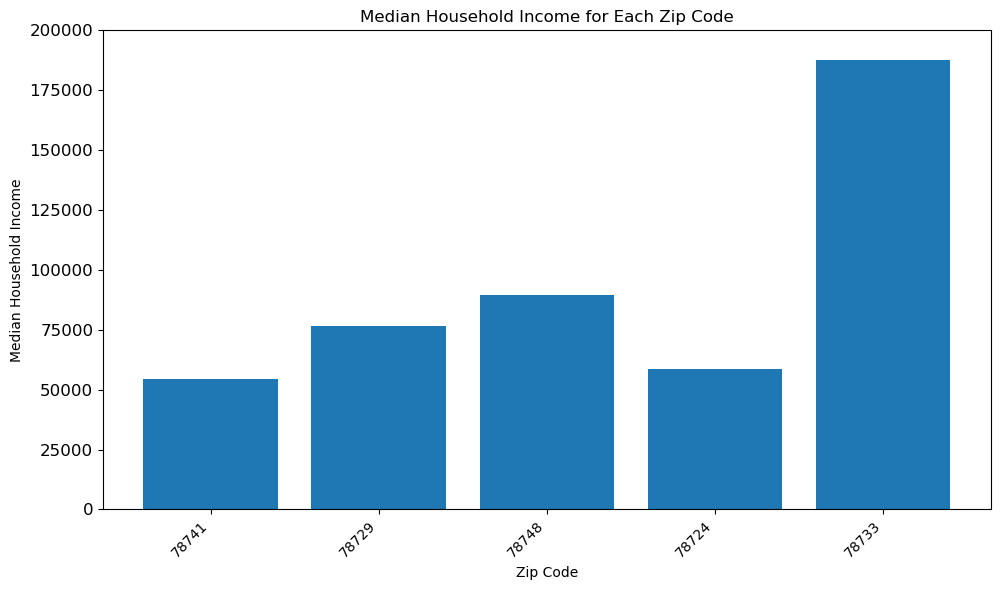

In [204]:
# Extract median household income for each zip code
median_income_78741 = zip_78741["MedianHouseholdIncome"].values[0]
median_income_78729 = zip_78729["MedianHouseholdIncome"].values[0]
median_income_78748 = zip_78748["MedianHouseholdIncome"].values[0]
median_income_78724 = zip_78724["MedianHouseholdIncome"].values[0]
median_income_78733 = zip_78733["MedianHouseholdIncome"].values[0]
# Create a list of median household income values
median_household_incomes = [median_income_78741, median_income_78729, median_income_78748, median_income_78724, median_income_78733]
# Convert data to integers
median_household_incomes = [int(income.replace("$", "").replace(",", "")) for income in median_household_incomes]
# Create a list of zip codes
zip_codes2 = ['78741', '78729', '78748', '78724', '78733']
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(zip_codes2, median_household_incomes)
plt.xlabel("Zip Code")
plt.ylabel("Median Household Income")
plt.title("Median Household Income for Each Zip Code")
plt.ylim(0, 200000)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.yticks(range(0, 200001, 25000), fontsize=12)
# Add text labels to the top of each bar
for bar, income in zip(bars, median_household_incomes):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${income:,}", ha="center", va="bottom", fontsize=10)
plt.show()